

# Day 1: Descriptive Statistics & Data Exploration in Machine Learning

## 1. Overview of Descriptive Statistics

### **A. Summary Statistics**
- **Mean**: The average value of a dataset.
- **Median**: The middle value when the data is ordered.
- **Mode**: The most frequently occurring value in the dataset.
- **Variance**: Measures how far a set of numbers are spread out from their average value.
- **Standard Deviation**: The square root of the variance, representing the average distance of data points from the mean.

### **B. Measures of Spread**
- **Range**: The difference between the maximum and minimum values.
- **Quartiles**: Values that divide the dataset into four equal parts.
  - **Q1 (25th percentile)**: The value below which 25% of the data fall.
  - **Q2 (50th percentile)**: The median.
  - **Q3 (75th percentile)**: The value below which 75% of the data fall.
- **Interquartile Range (IQR)**: The difference between Q3 and Q1, which measures the middle 50% of the data.
- **Skewness**: Measures the asymmetry of the distribution (positive or negative skew).
- **Kurtosis**: Measures the "tailedness" of the distribution.

### **C. Correlation and Covariance**
- **Covariance**: Measures how two variables change together. A positive covariance indicates that the variables tend to increase together, while a negative covariance indicates one increases as the other decreases.
- **Correlation**: A standardized measure of covariance that describes the strength and direction of a linear relationship between two variables. Ranges from -1 to +1.

## 2. Data Visualization Techniques

### **A. Histograms**
- Visual representation of the distribution of a numerical variable.
- Useful for understanding the shape, spread, and central tendency of the data.

### **B. Box Plots**
- Displays the distribution of a dataset based on a five-number summary: minimum, Q1, median, Q3, and maximum.
- Helps identify outliers visually.

### **C. Scatter Plots**
- A plot of two variables that allows for visual inspection of the relationship between them.
- Useful for identifying correlations and trends.

### **D. Correlation Heatmaps**
- A visual representation of the correlation matrix, helping to identify relationships between multiple features at once.

## 3. Hands-On Activities

### **A. Data Exploration Example with Titanic Dataset**
1. **Load the Dataset**:
   - Source: [Kaggle Titanic Dataset](https://www.kaggle.com/c/titanic/data)

2. **Summary Statistics**:
   - Compute mean, median, mode, variance, and standard deviation for key features (e.g., Age, Fare).

3. **Outlier Detection**:
   - Use the Interquartile Range (IQR) to detect outliers in the Fare feature.

4. **Visualizations**:
   - Create histograms for Age and Fare.
   - Create box plots to visualize outliers in Fare.
   - Generate a correlation heatmap to understand relationships between features.

### **B. Sample Code**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')


## 4. Connecting to Machine Learning

### **A. Feature Engineering**
- Based on data exploration, decide which features to scale and whether to transform or remove outliers.

### **B. Understanding Feature Selection**
- Use correlation results to identify highly correlated features and decide which features to keep or drop to avoid multicollinearity.

## 5. Additional Resources

- **Statistics for Data Science**:
  - [Khan Academy: Statistics and Probability](https://www.khanacademy.org/math/statistics-probability)
  - [Coursera: Statistics with Python Specialization](https://www.coursera.org/specializations/statistics-with-python)

- **Data Visualization Techniques**:
  - [Seaborn Documentation](https://seaborn.pydata.org/)
  - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

- **Hands-On Tutorials**:
  - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - [Kaggle Titanic Tutorial](https://www.kaggle.com/c/titanic)
 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
titanic = sns.load_dataset(name="titanic")

In [4]:
# titanic.info()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### IQR

In [40]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
 
fil =  ((titanic['fare'] >= (Q1 - 1.5 *IQR)) & (titanic['fare'] <=( Q3 + 1.5 *IQR)))
titanic[fil]

plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

### Histograms 

<Axes: xlabel='age', ylabel='Count'>

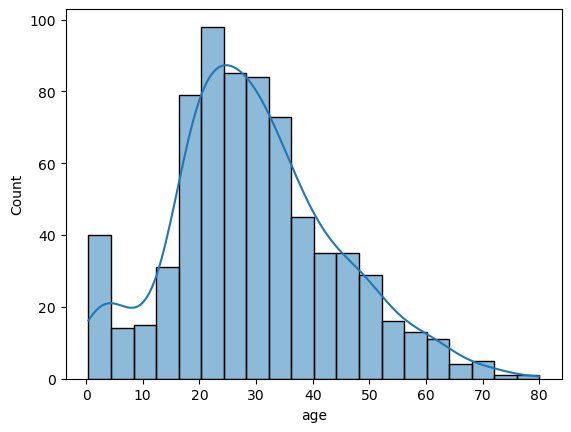

In [19]:
sns.histplot(data=titanic.age, kde=True)


<Axes: xlabel='fare', ylabel='Density'>

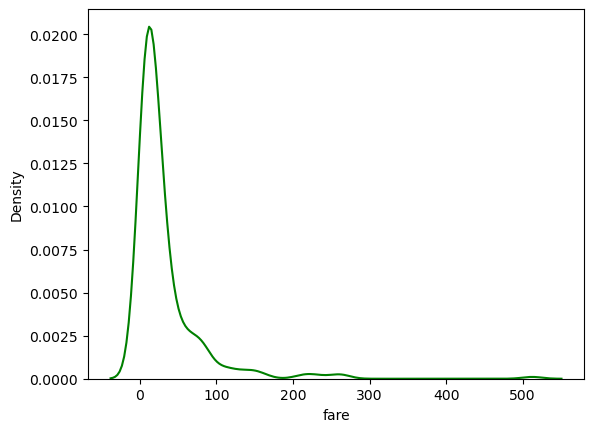

In [20]:
sns.kdeplot(data=titanic.fare, color="green")

<Axes: xlabel='age', ylabel='fare'>

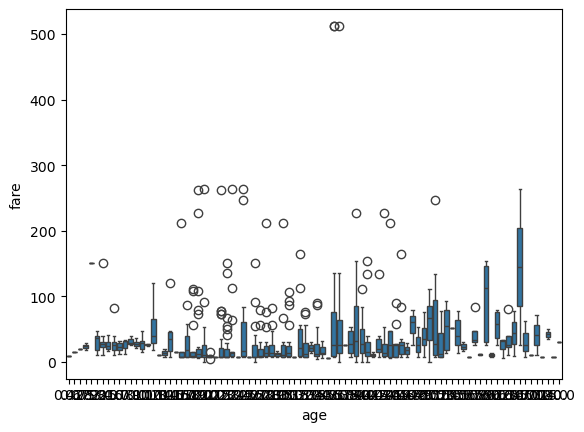

In [46]:
sns.boxplot(data=titanic, x='age', y='fare')

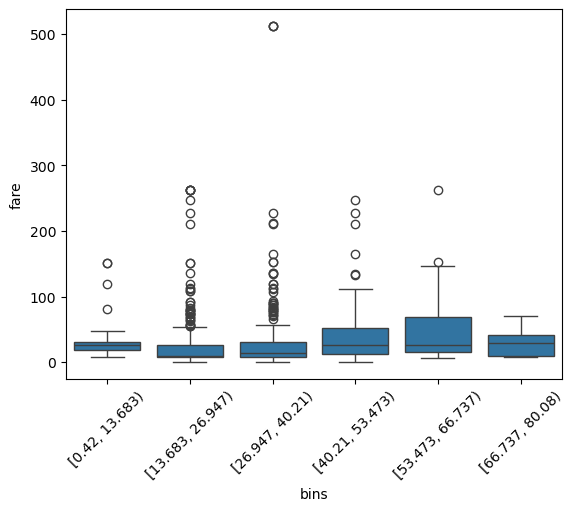

In [60]:
la = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
titanic['bins'] = pd.cut(titanic.age, bins=6, right=False)
titanic

sns.boxplot(data=titanic, x='bins', y='fare')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='age', ylabel='fare'>

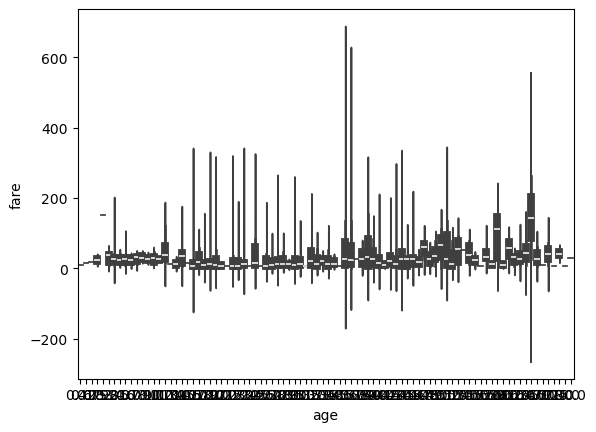

In [56]:
sns.violinplot(data=titanic, x='age', y='fare')